In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pin_result = np.loadtxt('data/odom_poses_kitti.txt', delimiter=' ', usecols=(3, 7), unpack=True)
lio_ekf_result = np.loadtxt('data/lio_ekf.txt', usecols=(1, 2,3), unpack=True)
pin_lio_ekf_result = np.loadtxt('data/pin_lio_ekf_odo.txt', usecols=(1, 2,3), unpack=True)
lio_ekf_wthout_correction_step = np.loadtxt('data/lio_ekf_wthout_correction_step.txt', usecols=(1, 2,3), unpack=True)

# Begin
First, if you want to install and run this program(PIN binding with LIO-EKF or Pinocchio repo). Please, read ohm.md

# GOAL
I want to bind LIO-EKF with PIN-SLAM, What does that mean?. Just basically we can call your cpp function on python code. \
And I finished the binding, except the part that needs ros packages e.g. Odometryserver because my computer has no ros and I want to work on 
the PIN visualizer. \
The goal is I want to test that, after binding, both of them work on that same coordinate frame. \
I guess for PIN_SLAM, the main coordinate frame is LiDAR frame because it has only one data source. \
Then, for LIO-EKF I also test by runnning only addIMU() and newIMUprocess(). \
So, I want to know that the INS/strapdown algorithm works correctly or not. \
The results are below where: (I tested on M2GDR, sequence street03)\
    &emsp; PIN is PIN,\
    &emsp; LIO_EKF is LIO_EKF,\
Let's assume that they are ground truth. and we can see they are quite same.\
Next:\
&emsp;pin_lio_ekf_result is the code I am working on, where I disable the correct step(precisely running only addIMU() and newIMUprocess(), pin_slam.py line 225, 226)\
As you can see that figure on the bottom left, the trajectory just go to one direction and never take any turns like PIN and LIO_EKF.\
So, something must be wrong. It should be bad but not this bad. HOWEVER,

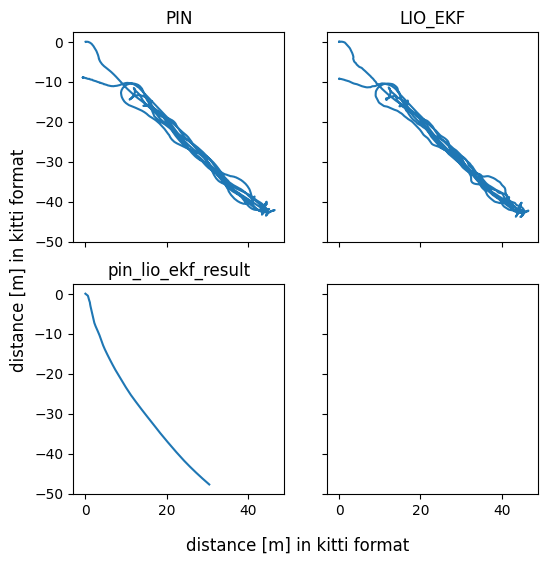

In [3]:
figure, axis = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6))
# For PIN
axis[0, 0].plot(pin_result[0], pin_result[1])
axis[0, 0].set_title("PIN")
# For LIO_EKF
axis[0, 1].plot(lio_ekf_result[0], lio_ekf_result[1])
axis[0, 1].set_title("LIO_EKF")
# For pin_lio_ekf_result
axis[1, 0].plot(pin_lio_ekf_result[0], pin_lio_ekf_result[1])
axis[1, 0].set_title("pin_lio_ekf_result")
# For lio_ekf_wthout_correction_step
# axis[1, 1].plot(lio_ekf_wthout_correction_step[0], lio_ekf_wthout_correction_step[1])
# axis[1, 1].set_title("lio_ekf_wthout_correction_step")

figure.supxlabel('distance [m] in kitti format')
figure.supylabel('distance [m] in kitti format')
plt.show()

## Another example
Now, I disable the correction step or stateFeedBack(), just to disable the correction step function. \
"lio_ekf_wthout_correction_step" is the result. Its shape is quite identical to the "pin_lio_ekf_result" above. \
ONLY THEY SHAPE but not the scale of the path, you can small dots on the bottom left of each, they are the trajectories above. \
So, I think that this could be the behaviour of the strapdown algorithm? Maybe?  \
And i think suppose to make the correction step work. Instead of debugging this thing. \

In [1]:
# figure, axis = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6))
# # For PIN
# axis[0, 0].plot(pin_result[0], pin_result[1])
# axis[0, 0].set_title("PIN")
# # For LIO_EKF
# axis[0, 1].plot(lio_ekf_result[0], lio_ekf_result[1])
# axis[0, 1].set_title("LIO_EKF")
# # For pin_lio_ekf_result
# axis[1, 0].plot(pin_lio_ekf_result[0], pin_lio_ekf_result[1])
# axis[1, 0].set_title("pin_lio_ekf_result")
# # For lio_ekf_wthout_correction_step
# axis[1, 1].plot(lio_ekf_wthout_correction_step[0], lio_ekf_wthout_correction_step[1])
# axis[1, 1].set_title("lio_ekf_wthout_correction_step")

# figure.supxlabel('distance [m] in kitti format')
# figure.supylabel('distance [m] in kitti format')
# plt.show()

In [1]:
import numpy as np

In [46]:
# urbanNav
Trans_lidar_imu_origin = np.array([[1, 0, 0], 
                                   [0, 1, 0], 
                                   [0, 0, 1,]])
imu_tran_R = np.array([ [0, 1, 0,],
                        [1, 0, 0], 
                        [0, 0, -1]])
imu_tran_R @ np.linalg.inv(Trans_lidar_imu_origin)
# For ENU type IMUs, the orientation of the world frame is x-east, y-north, z-up, relative to magnetic north.

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0., -1.]])

In [36]:
# m2dgr
Trans_lidar_imu_origin = np.array([[1, 0, 0], 
                                   [0, 1, 0], 
                                   [0, 0, 1,]])
imu_tran_R = np.array([ [1,0,0],
                        [0,-1,0], 
                        [0,0,-1]])
imu_tran_R @ np.linalg.inv(Trans_lidar_imu_origin)

# For NED type IMUs, the orientation of the world frame is x-north, y-east, z-down, relative to magnetic north.

array([[ 1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0., -1.]])

In [48]:
# newer college
Trans_lidar_imu_origin = np.array([[-1, 0, 0], 
                                   [0, -1, 0], 
                                   [0, 0, 1]])
imu_tran_R = np.array([ [0, -1,0],
                        [1,0,0], 
                        [0,0,1]])
imu_tran_R @ np.linalg.inv(Trans_lidar_imu_origin)

array([[ 0.,  1.,  0.],
       [-1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [37]:
# camera m2dgr
Trans_lidar_imu_origin = np.array([[0.,  0., 1.], 
                                   [-1,  0., 0.,], 
                                   [0.,  -1, 0]])
imu_tran_R = np.array([ [0, 0, 1],
                        [1, 0, 0], 
                        [0, 1, 0]])
imu_tran_R @ np.linalg.inv(Trans_lidar_imu_origin)
# For NED type IMUs, the orientation of the world frame is x-north, y-east, z-down, relative to magnetic north.

array([[ 1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0., -1.]])